In [1]:
!pip install shap
!pip install gurobipy
import ipywidgets as widgets #in modulo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import random
import os
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import shap
shap.initjs()
import gurobipy as gp
from gurobipy import GRB

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 1.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)
%cd gdrive/MyDrive/napoli

Mounted at /content/gdrive
/content/gdrive/MyDrive/napoli


In [3]:
from demo_func import *

DATASET SELECTION

In [4]:
dataset1 = 'campione'
dataset2 = 'titanic'

target = {dataset1: 'Recidivist', dataset2: 'Survived'}
columns_of_interest = {dataset2: ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived' ], dataset1: ['Age at entry', 'Length of imprisonment', 'Numbers of entries', 'Citizenship', 'Treatment', 'Recidivist']}
columns_for_analysis = {dataset1: ['Age at entry', 'Length of imprisonment', 'Numbers of entries', 'Citizenship', 'Treatment'], dataset2: ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch'] }

Dataset = widgets.Dropdown(
    options=[dataset1, dataset2],
    value=dataset1,
    description='Dataset:',
    disabled=False,
)
Dataset

Dropdown(description='Dataset:', options=('campione', 'titanic'), value='campione')

DATASET COLUMNS SELECTION

In [5]:
df=pd.read_excel('%s.xlsx' % Dataset.value, sheet_name='Sheet2')
np.random.seed(1)
df = df.sample(frac=1)
columns = df.columns.tolist()

Column = widgets.Dropdown(
    options=columns,
    description='Column:',
    disabled=False,
)

Column

Dropdown(description='Column:', options=('Age at entry', 'Length of imprisonment', 'Numbers of entries', 'Trea…

In [6]:
X_tot=df[columns_of_interest[Dataset.value]]
X=df[columns_for_analysis[Dataset.value]]
y=df[target[Dataset.value]]
train_dataset, test_dataset, _, _ = train_test_split(X_tot, y, test_size=0.3, random_state=1, stratify=y)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_dataset.drop([target[Dataset.value]], axis=1),train_dataset[target[Dataset.value]])
y_pred=clf.predict(test_dataset.drop(target[Dataset.value], axis=1))
explainer = shap.TreeExplainer(clf, train_dataset.drop([target[Dataset.value]], axis=1))

FEATURES VISUALIZATION

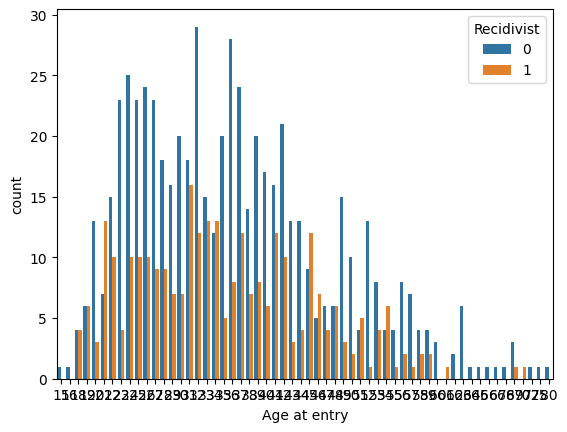

In [7]:
graph(target, Column, df, Dataset)

GLOBAL RANDOM FOREST

Accuracy global: 0.6481481481481481
REPORT:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       182
           1       0.45      0.36      0.40        88

    accuracy                           0.65       270
   macro avg       0.58      0.57      0.58       270
weighted avg       0.63      0.65      0.64       270



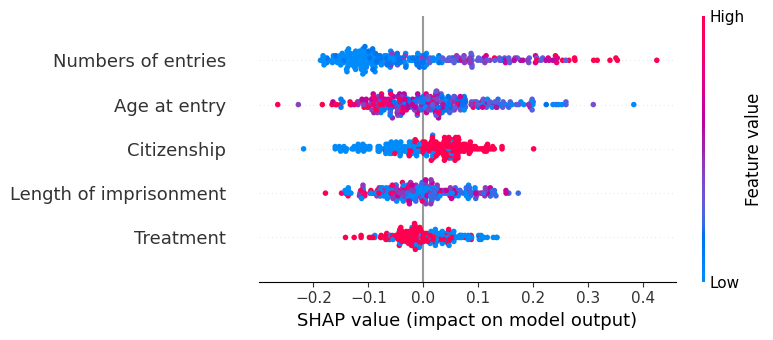

None


In [8]:
RF(df, columns_of_interest, Dataset, target, explainer, test_dataset, y_pred)

LOGISTIC REGRESSION: RELATIONSHIP WITH TARGET

In [9]:
Logit(df, Dataset, target, columns_for_analysis, train_dataset, test_dataset)

Accuracy logit: 0.7148148148148148
Features names: ['Age at entry', 'Length of imprisonment', 'Numbers of entries', 'Citizenship', 'Treatment']
Coefficients: [[-0.02696042 -0.0974177   0.16872459  0.64793105 -0.16600783]] [-0.25235783]


NEURAL NETWORKS

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
72/72 [==============================] - 1s 3ms/step - loss: 0.9305 - accuracy: 0.5444 - val_loss: 0.7087 - val_accuracy: 0.6667
Epoch 2/80
72/72 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6778 - val_loss: 0.6677 - val_accuracy: 0.6667
Epoch 3/80

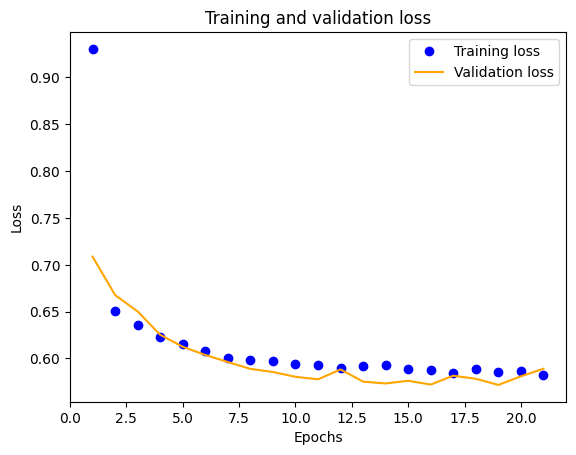

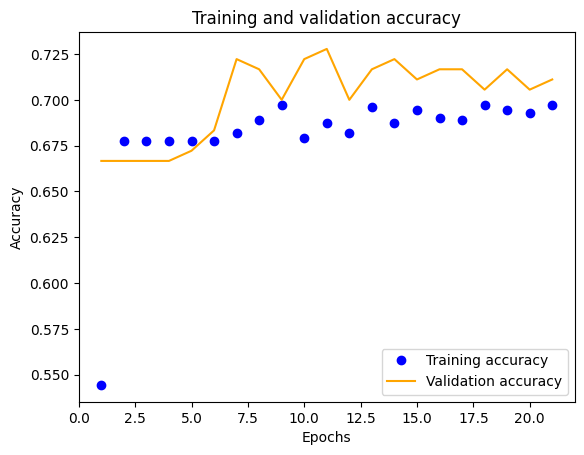

29/29 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       608
           1       0.62      0.19      0.29       292

    accuracy                           0.70       900
   macro avg       0.66      0.57      0.55       900
weighted avg       0.68      0.70      0.64       900

Max training acc: 0.6972222328186035
Max validation acc: 0.7277777791023254


In [10]:
Neural(X,y)

CONDITIONS SELECTION

In [11]:
if Dataset.value in columns_for_analysis:
  columns = columns_for_analysis[Dataset.value]
else:
  columns = columns_of_interest[Dataset.value]

sliders = {}
for col in columns:
  col_values = df[col]
  if df[col].dtype == 'object':
      # selection per colonne categoriche
      slider = widgets.Select(
          options=list(set(col_values)),
          value=col_values[0],
          description='%s:' % col
          )
  else:
      # intslider per colonne numeriche
      col_min = min(col_values)
      col_max = max(col_values)
      slider = widgets.IntRangeSlider(
          min=col_min,
          max=col_max,
          step=1,
          description='%s:' % col,
          value=[col_min,col_max]
      )
  display(slider)
  sliders[col] = slider

IntRangeSlider(value=(15, 80), description='Age at entry:', max=80, min=15)

IntRangeSlider(value=(0, 22), description='Length of imprisonment:', max=22)

IntRangeSlider(value=(0, 18), description='Numbers of entries:', max=18)

IntRangeSlider(value=(0, 1), description='Citizenship:', max=1)

IntRangeSlider(value=(0, 1), description='Treatment:', max=1)

LOCAL RANDOM FOREST (MANUAL)

Accuracy local: 0.6481481481481481
REPORT:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       182
           1       0.45      0.36      0.40        88

    accuracy                           0.65       270
   macro avg       0.58      0.57      0.58       270
weighted avg       0.63      0.65      0.64       270



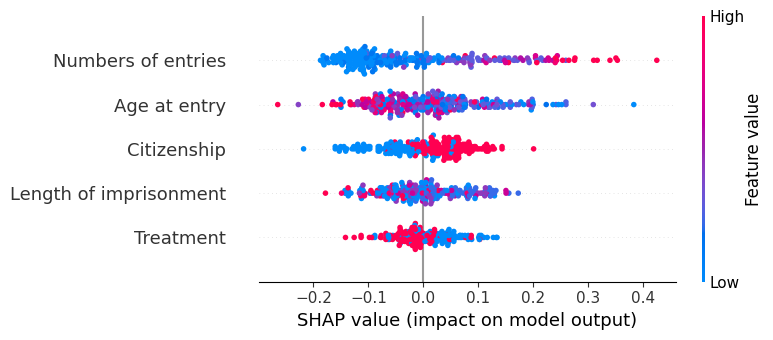

In [12]:
local(Dataset, test_dataset, target, columns, sliders, clf, explainer)

ACCURACY OPTIMIZATION

[80 22 18  1  1]
[15  0  0  0  0]
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2442013
Academic license 2442013 - for non-commercial use only - registered to fl___@uniroma1.it
Set parameter TimeLimit to value 600
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2442013 - for non-commercial use only - registered to fl___@uniroma1.it
Optimize a model with 5946 rows, 2980 columns and 16704 nonzeros
Model fingerprint: 0xb8488518
Variable types: 10 continuous, 2970 integer (2970 binary)
Coefficient statistics:
  Matrix range     [8e-02, 2e+02]
  Objective range  [3e-03, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-04, 2e+02]
Found heuristic solution: objective 0.8333333
Presolve removed 769 rows and 0 columns
Presolve time: 0.05s
Presolved: 5177 rows, 

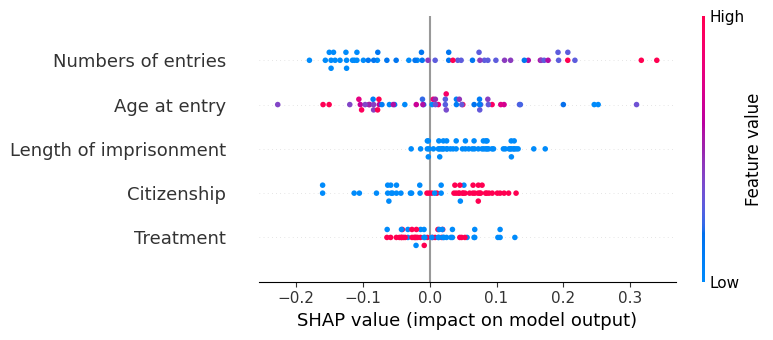

In [13]:
optimizer(Dataset, 0.92, test_dataset, columns, target, y_pred, sliders, explainer, clf)